In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [4]:
import sys
from pathlib import Path
home = str(Path.home())

sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

In [5]:
import pyrankability

## Analysis

In [11]:
DATAFILE=f"{home}/japan_io_analysis/jpn2005_liot_w_trim/jpn1995_liot.csv"

In [12]:
SECTORSFILE=f"{home}/japan_io_analysis/jpn2005_liot_sector_name.csv"

In [13]:
sectors = pd.read_csv(SECTORSFILE,header=None)
sectors = sectors[0]
sectors

0                                       Crop cultivation
1                                              Livestock
2                                  Agricultural services
3                                               Forestry
4                                              Fisheries
                             ...                        
97                                        Accommodations
98     Cleaning, barber shops, beauty shops and publi...
99                               Other personal services
100                                      Office supplies
101                  Activities not elsewhere classified
Name: 0, Length: 102, dtype: object

In [14]:
D = pd.read_table(DATAFILE,sep=',',header=None)

In [15]:
D

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0.023481,0.104087,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.137335,0.054858,...,0.0,0.0,0.0,0.0,0.017944,0.013755,0.000000,0.0,0.0,0.0
1,0.012583,0.107123,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.092838,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.069588,0.046472,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.234211,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.049383,0.0,0.000000,0.000000,0.052294,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028682,0.0,0.0,0.0
99,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
100,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [16]:
D.columns=sectors

In [17]:
D.index=sectors

In [20]:
delta,details = pyrankability.rank.solve(D,method='lop',cont=False)
delta

Using license file /home/jupyter-pander14/gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-06


2.1591416

In [15]:
k

46.85598382000097

## Run the bilp solver and report up to 50 unique solutions

In [16]:
k_bilp_0,details_bilp_0 = pyrankability.lop.bilp(D.values)

Updating opjective in 0.3185 seconds
Start optimization 0
Optimization in 101.9705 seconds
End optimization 0


In [17]:
k_bilp_0

39.4411726

In [18]:
k_bilp,details_bilp = pyrankability.lop.bilp(D.values,max_solutions=1,num_random_restarts=50)

Updating opjective in 0.3156 seconds
Start optimization 0
Optimization in 104.2810 seconds
End optimization 0
Read MPS format model from file /tmp/tmp9b1swopq/model.mps
Reading time = 1.07 seconds
lop: 1040604 rows, 10404 columns, 3111306 nonzeros
Updating opjective in 0.3109 seconds
Start optimization 1
Optimization in 61.3763 seconds
End optimization 1
Read MPS format model from file /tmp/tmp9b1swopq/model.mps
Reading time = 1.05 seconds
lop: 1040604 rows, 10404 columns, 3111306 nonzeros
Updating opjective in 0.3214 seconds
Start optimization 2
Optimization in 78.1337 seconds
End optimization 2
Read MPS format model from file /tmp/tmp9b1swopq/model.mps
Reading time = 1.07 seconds
lop: 1040604 rows, 10404 columns, 3111306 nonzeros
Updating opjective in 0.3179 seconds
Start optimization 3
Optimization in 72.7389 seconds
End optimization 3
Read MPS format model from file /tmp/tmp9b1swopq/model.mps
Reading time = 1.07 seconds
lop: 1040604 rows, 10404 columns, 3111306 nonzeros
Updating op

KeyboardInterrupt: 

Reading time = 1.07 seconds
lop: 1040604 rows, 10404 columns, 3111306 nonzeros


Exception ignored in: 'gurobipy.logcallbackstub'
Traceback (most recent call last):
  File "/data/env/lib/python3.6/site-packages/ipykernel/iostream.py", line 384, in write
    def write(self, string):
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
k_bilp

In [200]:
len(details_bilp['P'])

51

## What is saved in the details
In case we want, I have stored the first P found, all the P found, the first x found, the objective values each time, and the x matrices each time

In [101]:
details_bilp.keys()

dict_keys(['Pfirst', 'P', 'x', 'objs', 'xs'])

## Important to check
It is important to check and make sure all solutions are optimal. Running this check helped me sort out a bug or two.

In [102]:
objs=[]
for perm in details_bilp['P']:
    objs.append(pyrankability.lop.objective_count_perm(D.values,perm))

In [104]:
pd.Series(objs)

0     46.855984
1     46.855984
2     46.855984
3     46.855984
4     46.855984
5     46.855984
6     46.855984
7     46.855984
8     46.855984
9     46.855984
10    46.855984
11    46.855984
12    46.855984
13    46.855984
14    46.855984
15    46.855984
16    46.855984
17    46.855984
18    46.855984
19    46.855984
20    46.855984
21    46.855984
22    46.855984
23    46.855984
24    46.855984
25    46.855984
26    46.855984
27    46.855984
28    46.855984
29    46.855984
30    46.855984
31    46.855984
32    46.855984
33    46.855984
34    46.855984
35    46.855984
36    46.855984
37    46.855984
38    46.855984
39    46.855984
40    46.855984
41    46.855984
42    46.855984
43    46.855984
44    46.855984
45    46.855984
46    46.855984
47    46.855984
48    46.855984
49    46.855984
50    46.855984
dtype: float64

## Now let's put the unique solutions in a Pandas dataframe

In [201]:
P_unique = list(set(details_bilp['P']))
P_df = pd.DataFrame(P_unique)
P_df

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,94,72,73,71,93,92,88,7,27,67,...,69,98,66,70,49,97,89,100,96,86
1,94,72,73,71,93,88,92,7,27,67,...,79,74,68,63,51,56,49,31,87,78
2,94,72,73,71,93,92,88,7,27,67,...,68,97,47,100,11,31,51,49,74,86
3,94,72,73,71,93,88,92,7,27,67,...,97,66,74,96,45,99,31,65,100,86
4,94,72,73,71,93,88,92,7,27,67,...,56,89,53,57,47,100,49,96,74,61
5,94,72,73,71,93,88,92,7,27,67,...,100,9,96,97,11,52,56,78,68,66
6,94,72,73,71,93,88,92,7,27,67,...,78,70,97,61,86,87,98,100,89,66
7,94,72,73,71,93,92,88,7,27,67,...,69,98,89,97,96,86,65,87,100,49
8,94,72,73,71,93,88,92,7,27,67,...,97,98,89,86,61,49,78,99,31,96
9,94,72,73,71,93,92,88,7,27,67,...,53,52,47,100,56,51,49,45,31,11


In [179]:
P_df.to_csv("/disk/home/amy/results/japan_95_P.csv",index=False)

In [176]:
corrs = P_df.T.corr(method='spearman').stack()
corrs[corrs != 1].mean()

0.47553459924888575

In [117]:
P_series=P_df.T.stack()

In [181]:
corrs[corrs != 1].idxmin()

(22, 29)

In [184]:
P_df.loc[[22,29]].to_csv("/disk/home/amy/results/japan_95_P_two_min.csv",index=False)

In [124]:
pos_df = P_series.index.to_frame()
pos_df.columns=["Position","Solution Index"]
pos_df["Item"] = P_series
pos_df.set_index("Solution Index",inplace=True)
pos_df

,Position,Item
Solution Index,,
0,0,94
1,0,94
2,0,94
3,0,94
4,0,94
...,...,...
46,101,45
47,101,63
48,101,53


## Visualizing some of the top items
In the graph below the x axis is the rank or position in the solutions. I'm keeping it simple and showing the top 16. What I would point out is that things like items 77 and 21 (unfortunately they are both red, so I need more colors). I think that constitutes a lot of movement. If I've got everything aligned correct 77 and 21 ware associated with Water transport and Petrochemical basic products. Item 5 is another interesting case that goes from position 10 to position 16. Item 5 is Metallic ores. So the big question is so what? Is this the breakthrough reason for our approach? Would anyone be interested in these alternative solutions?

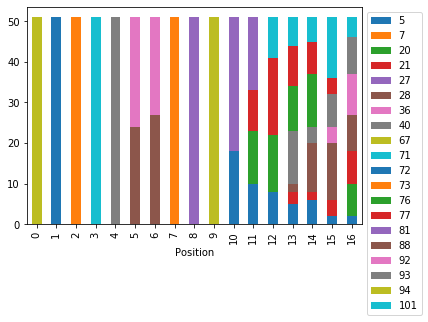

In [164]:
graph_df = pos_df.groupby("Position")["Item"].value_counts().to_frame()
graph_df.columns = ["Count"] 
graph_df = graph_df.head(50).reset_index().set_index("Position").pivot(columns="Item").fillna(0)
graph_df.columns = [v[1] for v in graph_df.columns]
graph_df.plot.bar(stacked=True).legend(bbox_to_anchor=(1, 1))

In [168]:
D.index[77],D.index[101],D.index[21],D.index[5]

('Water transport',
 'Activities not elsewhere classified',
 'Petrochemical basic products',
 'Metallic ores')

## Save the results for later

In [106]:
#!mkdir /disk/home/amy/results/

In [107]:
import joblib
joblib.dump(details_bilp,"/disk/home/amy/results/japan_95_details_bilp.joblib.z")

['/disk/home/amy/results/japan_95_details_bilp.joblib.z']

## Below is analysis of the lp results

In [111]:
Xstar = pyrankability.lop.threshold_x(details['x'],lower_cut=1e-3,upper_cut=1-1e-3)

record_ixs = []
r = np.sum(Xstar,axis=1)
ixs = np.argsort(r)
record_ixs.append(ixs)
Xstar_rowsum = Xstar[np.ix_(ixs,ixs)]

r = np.sum(details_bilp['x'],axis=1)
ixs = np.argsort(r)
record_ixs.append(ixs)
Xstar_bilp = Xstar[np.ix_(ixs,ixs)]

labels = ["A. BILP by rowsum", "B. Ordered by rowsum"]
Xstars = [Xstar_bilp,Xstar_rowsum]

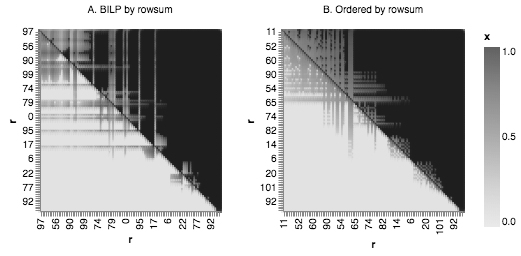

In [112]:
import altair as alt
alt.data_transformers.disable_max_rows()

all_df = pd.DataFrame(columns=["i","j","x","Label","oi","oj"])
for ix,Xstar in enumerate(Xstars):
    x = pd.DataFrame(Xstar)
    df = x.stack().reset_index()
    df.columns=["i","j","x"]
    df["oi"] = df["i"].copy()
    df["oj"] = df["j"].copy()
    df["i"] = record_ixs[ix][df["i"]]
    df["j"] = record_ixs[ix][df["j"]]
    df["Label"] = labels[ix]
    all_df = all_df.append(df)

#all_df = all_df.loc[(all_df.x != 0) & (all_df.x != 1)]
alt.Chart(all_df).mark_square().encode(
    x=alt.X(
        'i:N',
        axis=alt.Axis(labelOverlap="parity"),
        title="r",
        sort=alt.EncodingSortField(field="oi",order="ascending") # The order to sort in
    ),
    y=alt.Y(
        'j:N',
        axis=alt.Axis(labelOverlap="parity"),
        title="r",
        sort=alt.EncodingSortField(field="oj",order="ascending") # The order to sort in
    ),
    color=alt.Color("x",scale=alt.Scale(scheme='greys'))
).properties(
    width=180,
    height=180
).facet(
    column=alt.Column("Label:N", title=None)
).resolve_scale(x='independent',y='independent')

In [114]:
pd.Series(D.columns[record_ixs[0]])

0                                         Accommodations
1      Medical service, health, social security and n...
2                             Eating and drinking places
3                                  Public administration
4      Cleaning, barber shops, beauty shops and publi...
                             ...                        
97                  Repair of motor vehicles and machine
98                                              Commerce
99              Real estate agencies and rental services
100                                Finance and insurance
101                              Other business services
Name: 0, Length: 102, dtype: object

## Still in development
This is still in development for this size.

In [26]:
# P,info = pyrankability.lop.find_P_from_x(D.values,k,details)

Going to loop for 2.0
Going to loop for 4194304.0
Going to loop for 524288.0
Going to loop for 2.4049076047604052e+111


KeyboardInterrupt: 